<a href="https://colab.research.google.com/github/rodmart21/CV/blob/main/CV_MNIST_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install tensorflow

## We are going to use the MINST database, the most common computer vision dataset, to train a model using the labels that we have and then we will test it with the rest of values that we have.

### In this database we just have diferent images with numbers and we put a label to each one of them.

In [ ]:
import datetime
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np
from datetime import datetime

### We split in training and test and we print some of them to see how they look.

11490434/11490434 [==============================] - 0s 0us/step


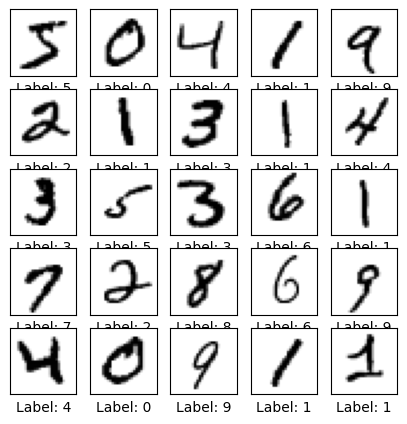

In [ ]:
# We take the data from MNIST.
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# We normalize the values for training and test.
x_train, x_test = x_train / 255.0, x_test / 255.0

# Le's show some images and see how they look.
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(f'Label: {y_train[i]}')
plt.show()


## We will take a small amount data to go faster with the train of the model.

In [ ]:
# We use some data for the training to go faster.
x_train_small = x_train[:600]
y_train_small = y_train[:600]
x_test_small = x_test[:100]
y_test_small= y_test[:100]

### Train the model with different k values and check how it works.

Training Duration: 0:20:47.130314


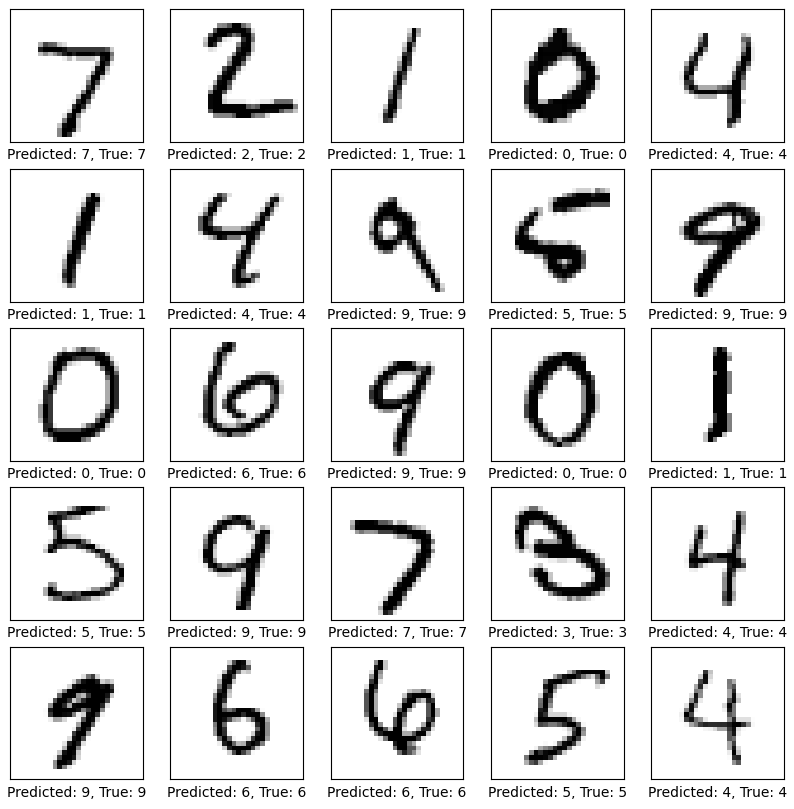

In [ ]:
# Transform the data in order to be understood by OpenCV:
x_train_flattened = x_train.reshape((x_train.shape[0], -1)).astype(np.float32)
x_test_flattened = x_test.reshape((x_test.shape[0], -1)).astype(np.float32)
y_train_flattened = y_train.astype(np.float32)

# Create the k-NN model:
knn = cv2.ml.KNearest_create()
knn.train(x_train_flattened, cv2.ml.ROW_SAMPLE, y_train_flattened)

# Train with different k values:
k_values = [1, 2, 3, 4, 5]
k_result = []

start_datetime = datetime.now()

for k in k_values:
    ret, result, neighbours, dist = knn.findNearest(x_test_flattened, k=k)
    k_result.append(result)

# Flatten the data:
flattened = []
for res in k_result:
    flat_result = [item for sublist in res for item in sublist]
    flattened.append(flat_result)

end_datetime = datetime.now()
print('Training Duration: ' + str(end_datetime - start_datetime))

# Visualize some results:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(f'Predicted: {int(flattened[0][i])}, True: {y_test[i]}')
plt.show()
